# INPEDownloader
## WRF Forecasts

The INPERainDownloader package also allows us to pull forecasts provided by the WRF model, with a maximum of 7 days in advance. <br>
One basic difference from the forecasts to the actual measurements or climatology is that we need to specify the reference date. 

For example, if we want to get the forecast for 2023-05-12, we need to pass what is the day that this forecast was created. As we have a 7-day forecast, we could use 2023-05-11 (1-day forecast), or 2023-05-05 (7-day forecast).

In [1]:
%load_ext autoreload
%autoreload 2

import geopandas as gpd

from raindownloader.downloader import Downloader
from raindownloader.inpeparser import INPEParsers, INPETypes

In [2]:
download_folder = '/workspaces/reports_folder/downloads/'

In [3]:
downloader = Downloader(
    server=INPEParsers.FTPurl, 
    parsers=INPEParsers.parsers, 
    local_folder=download_folder
)

In [4]:
brazil = gpd.read_file('../data/states/')

<Axes: >

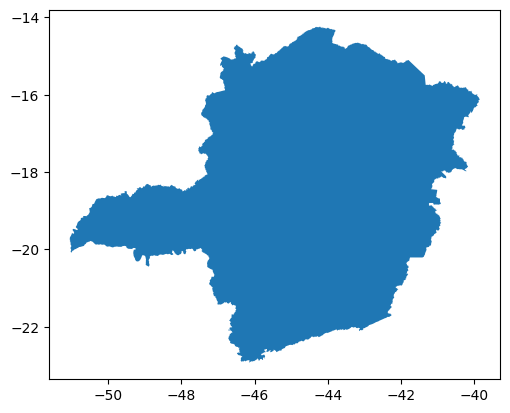

In [5]:
mg = brazil.query("SIGLA_UF == 'MG'")
mg.plot()

In [6]:
# check the daily rain in May
cube = downloader.create_cube(
    start_date='20230501',
    end_date='20230531',
    datatype=INPETypes.DAILY_RAIN
)

In [7]:
len(cube.time)

31

The forecast cube must be created iteratively, because the reference date depends on the forecast_lag. For that, we have another method called `create_forecast_cube` where we pass the `forecast_lag`. Like so

In [8]:
parser = downloader.get_parser(INPETypes.DAILY_WRF)
parser

Parser instance: DAILY_WRF

In [9]:
# check the daily rain in May
forecast_cube = downloader.create_forecast_cube(
    start_date='20230501',
    end_date='20230531',
    forecast_lag=1
)


error_perm: 550 /modelos/tempo/WRF/ams_07km/recortes/prec/2023/05/01/00/WRF_cpt_07KM_2023050100_2023050113.grib2: No such file or directory